In [1]:
import pickle 
import networkx as nx 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.cm as cm
from empath import Empath
import seaborn as sns
import math
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import pyLDAvis
import pyLDAvis.gensim
import operator
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout
import random

In [61]:
def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()
    
def findMedianCentrality(graph):
    return np.median(nx.closeness_centrality(graph.to_undirected()).values())

def findTopicalEdgeWeight(graph):
    edges = graph.edges(data=True)
    meantopical = float(sum([e[2]['weight'] for e in edges]))/float(len(edges))
    return meantopical

def findMaxWeightSpread(graph):
    edges = graph.edges(data=True)
    edgeTopics = [e[2]['weight'] for e in edges]
    return (float(max(edgeTopics)) - float(min(edgeTopics)))

def findMaxTopicSpread(graph):
    topicSpreads = []
    for u,v,d in graph.edges(data=True):
        if graph.has_edge(v,u):
            topicSpread = d['weight'] - graph[v][u]['weight']
            topicSpreads.append(topicSpread)
    if len(topicSpreads) > 0:
        ans = (float(max(topicSpreads)) - float(min(topicSpreads)))
    else:
        ans = 0.0
    return ans
    
def getMetrics(graphDict):
    medCentralities = []
    medClusterings = []
    for k in graphDict:
        medCentrality = np.mean(nx.closeness_centrality(graphDict[k].to_undirected()).values())
        medClustering = np.mean(nx.clustering(graphDict[k].to_undirected()).values())
        if np.isnan(medCentrality):
            print "Found Nan centrality"
            continue
        else:
            medCentralities.append(medCentrality)
        if np.isnan(medClustering):
            print "Found Nan Clustering"
            continue
        else:
            medClusterings.append(medClustering)
        
    return medClusterings , medCentralities


def getScaledSizes(graph):
    affects = nx.get_node_attributes(graph, 'affects')
    s = [int(affects[v]) for v in graph.nodes()]
    normed = [i + 10 for i in s]
    scaled = [v*(2^(v-np.min(normed)))+100 for v in normed]
    return scaled

def drawReplyGraph(graph):
    cascadeGraph = graph
    sizes = getScaledSizes(cascadeGraph)
    pos = graphviz_layout(cascadeGraph, prog='neato')

    usr = list(set(nx.get_node_attributes(cascadeGraph, 'author').values()))
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in cascadeGraph:
        c = usr.index(cascadeGraph.node[node]['author'])
        colorMap.append(color[c])
        lls[node] = cascadeGraph.node[node]['author']
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    nx.draw(cascadeGraph,pos=pos ,node_size=sizes ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

def drawUserGraph(graph):
    ugraph = graph
    pos = graphviz_layout(ugraph, prog='neato')

    usr = ugraph.nodes()
    print len(usr)
    color=cm.rainbow(np.linspace(0,1,len(usr)))
    colorMap = []
    lls = {}
    for node in ugraph:
        c = usr.index(node)
        colorMap.append(color[c])
        lls[node] = node
    fig, ax = plt.subplots()
    fig.set_size_inches(40, 30)
    #
    nx.draw(ugraph,pos=pos ,node_color=colorMap , with_labels = True , labels = lls , font_size=25)
    plt.show()

In [3]:
SW_Graphs= pickle.load(open("../Data/SW_TopicUgraphs.pkl",'rb'))
BL_Graphs= pickle.load(open("../Data/BL_TopicUgraphs.pkl",'rb'))

In [15]:
ReplyGraphs_SW = pickle.load(open("../Data/reddit_suicideWatch/SW_morethan10_graphs_complete_revised/SW_morethan10_deeper_replygraphs_v3.pkl",'rb'))
ReplyGraphs_BL = pickle.load(open("../Data/FrontPage/graphs/frontPage_replygraphs.pkl",'rb'))

In [16]:
UserGraphs_SW = pickle.load(open("../Data/SW_ugraph.pkl",'rb'))
UserGraphs_BL = pickle.load(open("../Data/FrontPage/FP_ugraph.pkl",'rb'))

In [4]:
SW_medClusterings , SW_medCentralities = getMetrics(SW_Graphs)

Found Nan centrality
Found Nan centrality
Found Nan centrality


In [5]:
BL_medClusterings , BL_medCentralities = getMetrics(BL_Graphs)

Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan cen

Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality


In [6]:
len(BL_medClusterings) , len(SW_medClusterings)

(8777, 10154)

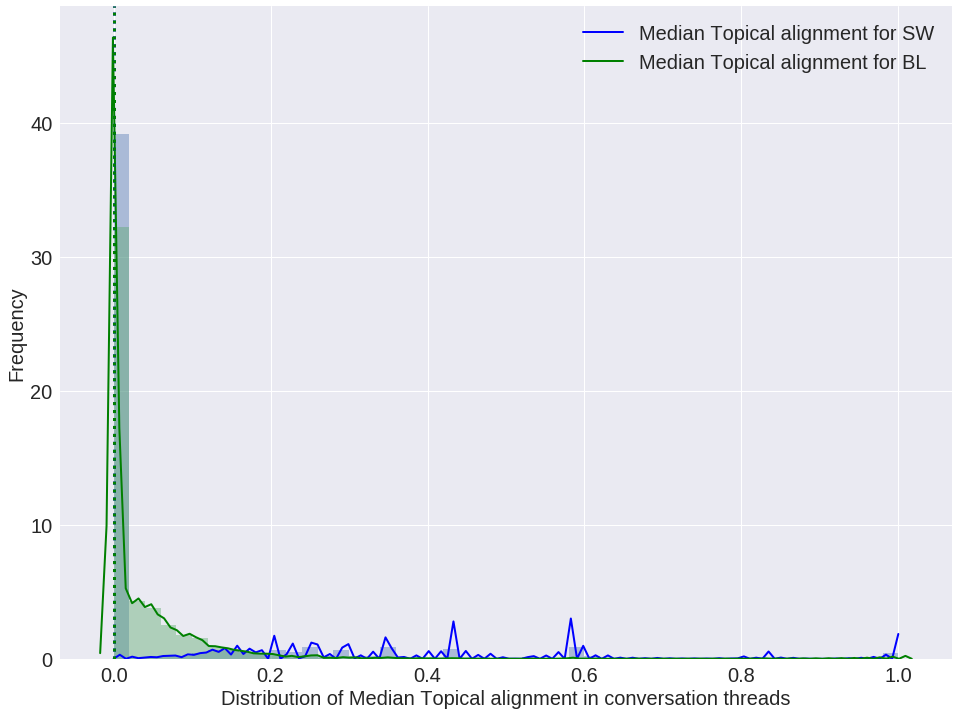

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
sns.set(font_scale=2) 
sns.distplot(SW_medClusterings,kde_kws={"color": "b", "lw": 2, "label": "Median Topical alignment for SW"})
sns.distplot(BL_medClusterings,kde_kws={"color": "g", "lw": 2, "label": "Median Topical alignment for BL"})
ax.axvline(x=np.median(SW_medClusterings), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.median(BL_medClusterings), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.xlabel("Distribution of Median Topical alignment in conversation threads" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

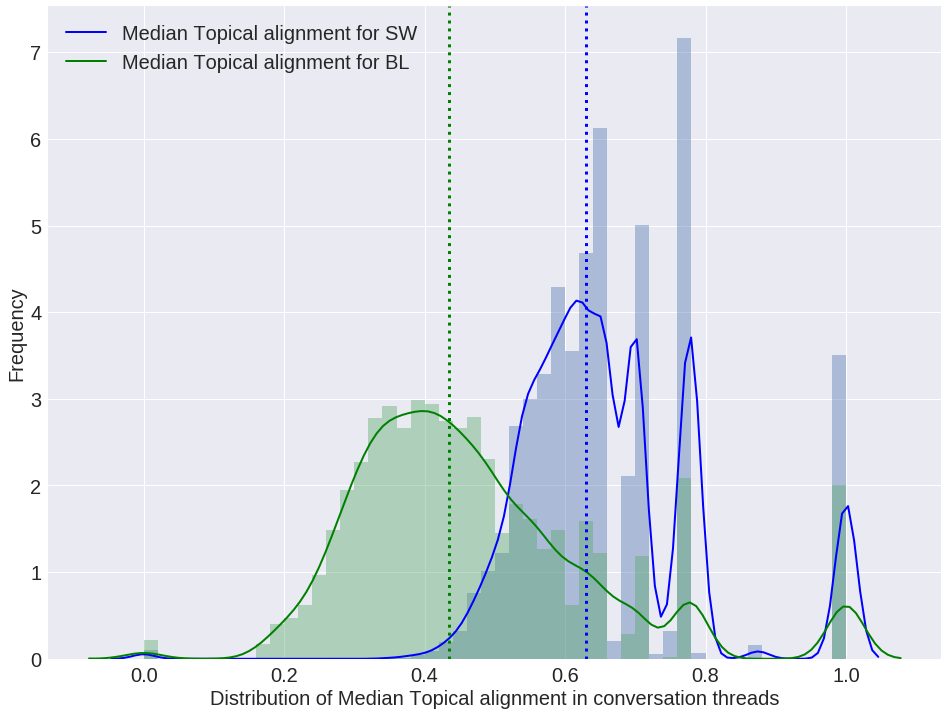

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
sns.set(font_scale=2) 
sns.distplot(SW_medCentralities,kde_kws={"color": "b", "lw": 2, "label": "Median Topical alignment for SW"})
sns.distplot(BL_medCentralities,kde_kws={"color": "g", "lw": 2, "label": "Median Topical alignment for BL"})
ax.axvline(x=np.median(SW_medCentralities), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.median(BL_medCentralities), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.xlabel("Distribution of Median Topical alignment in conversation threads" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

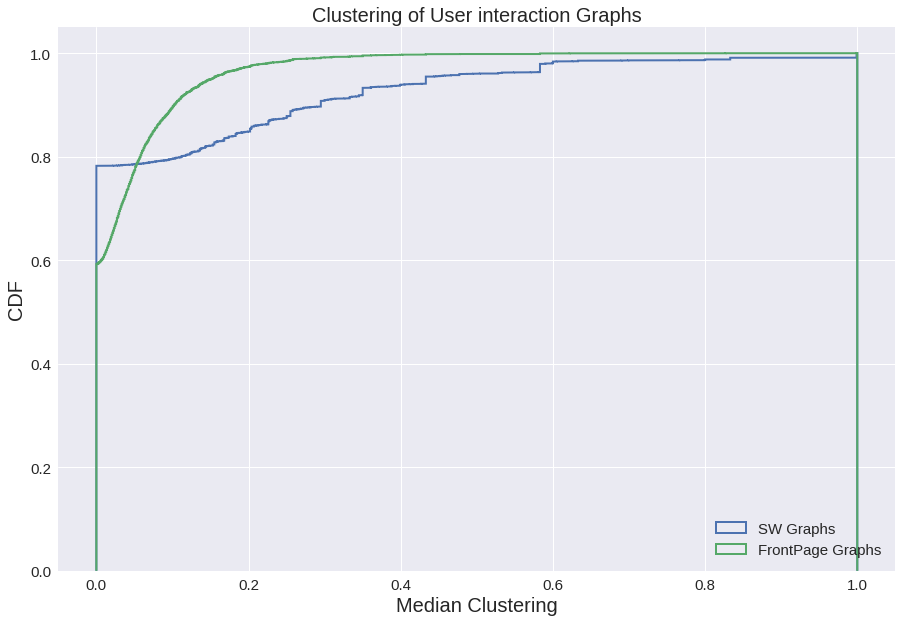

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(SW_medClusterings, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(BL_medClusterings, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Clustering of User interaction Graphs", fontsize = 20)
plt.xlabel("Median Clustering",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['SW Graphs','FrontPage Graphs'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

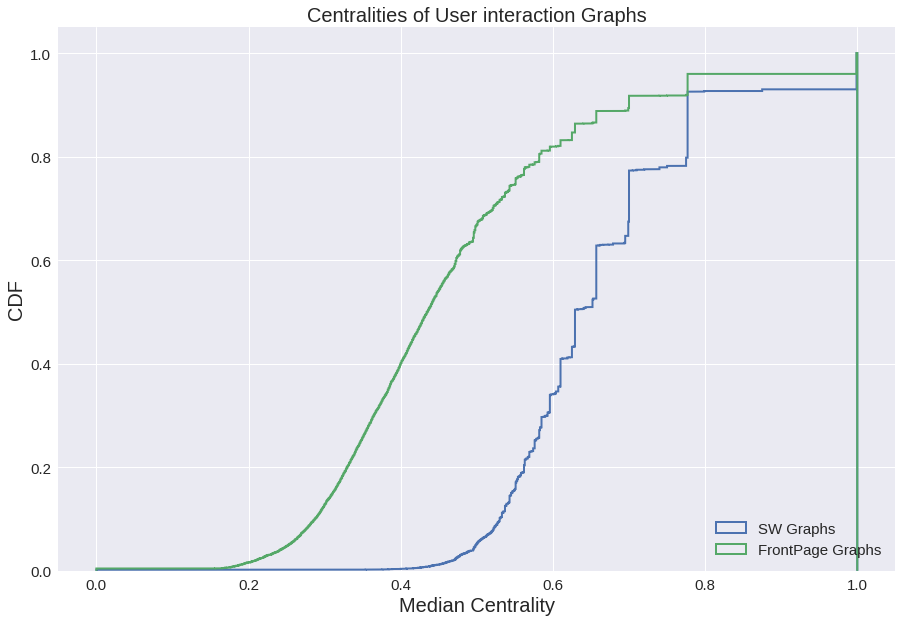

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
n1 , bins1 , patches1 = plt.hist(SW_medCentralities, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)
n2 , bins2 , patches2 = plt.hist(BL_medCentralities, 1000, normed=1,histtype='step', cumulative=True,linewidth = 2.0)

plt.title("Centralities of User interaction Graphs", fontsize = 20)
plt.xlabel("Median Centrality",fontsize = 20)
plt.ylabel("CDF",fontsize = 20)
plt.legend(['SW Graphs','FrontPage Graphs'], loc='lower right',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.grid()
plt.show()

9


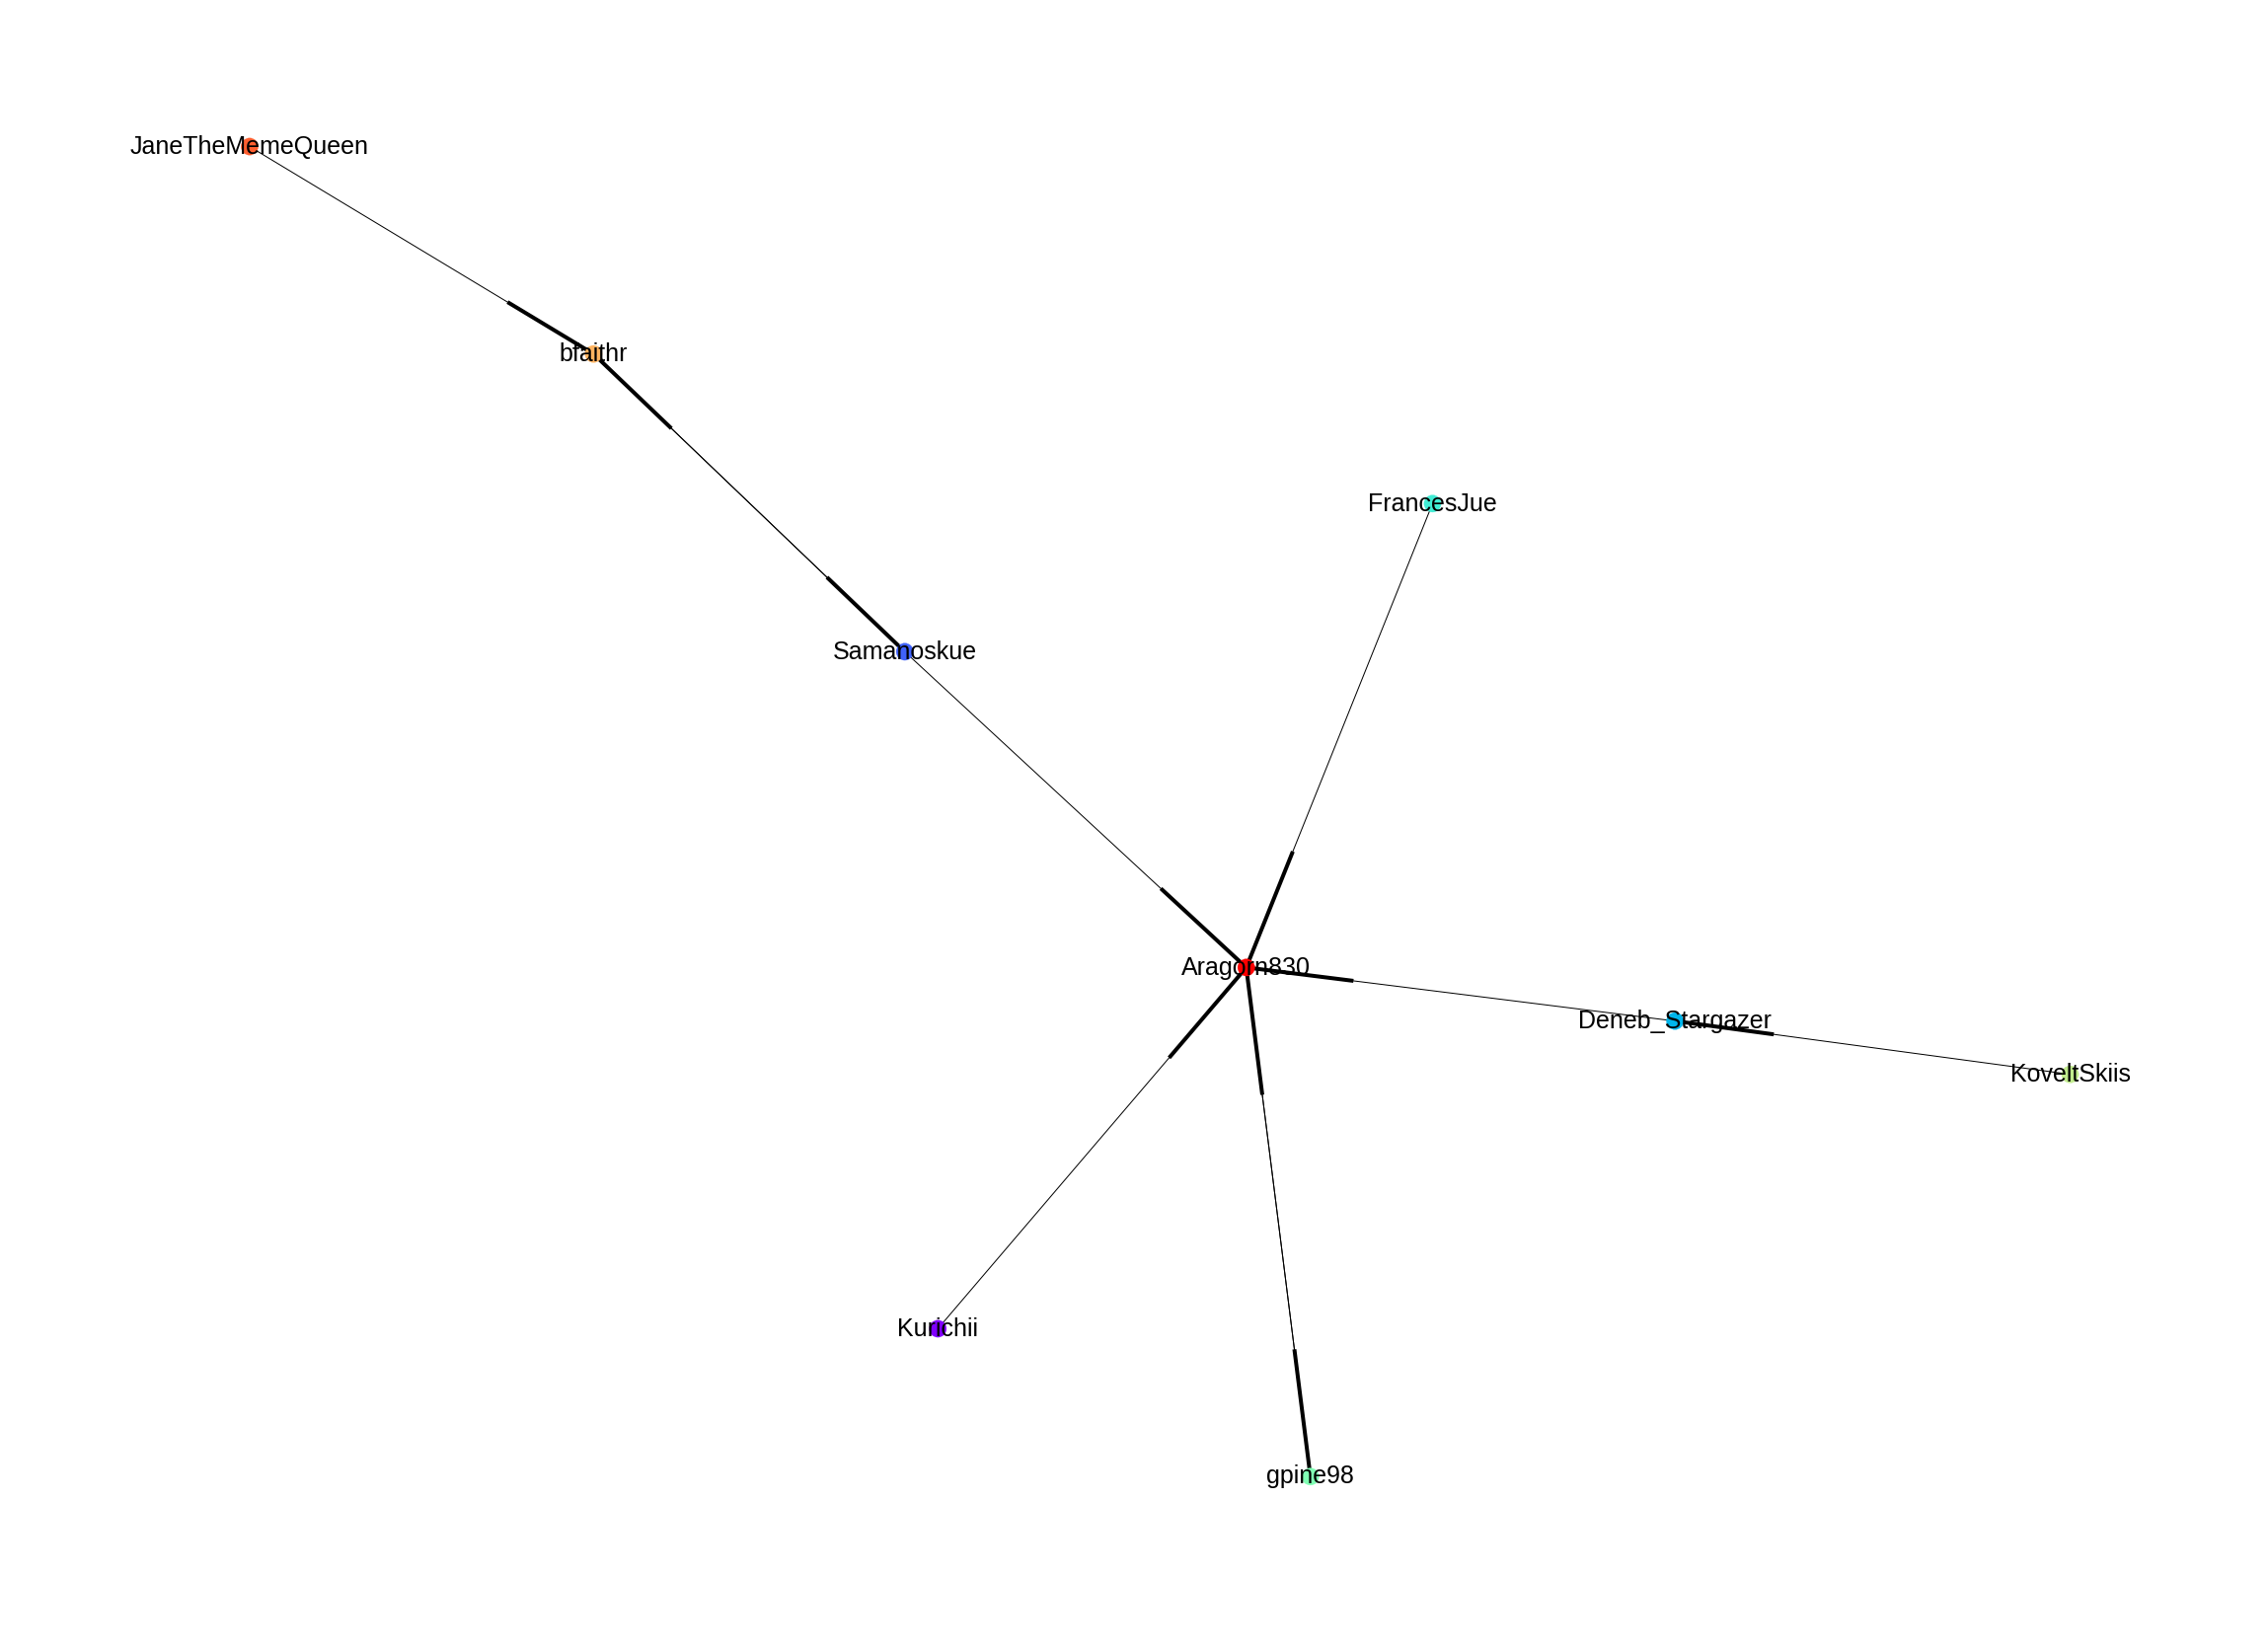

In [66]:
drawUserGraph(BL_Graphs[BL_Graphs.keys()[1]])

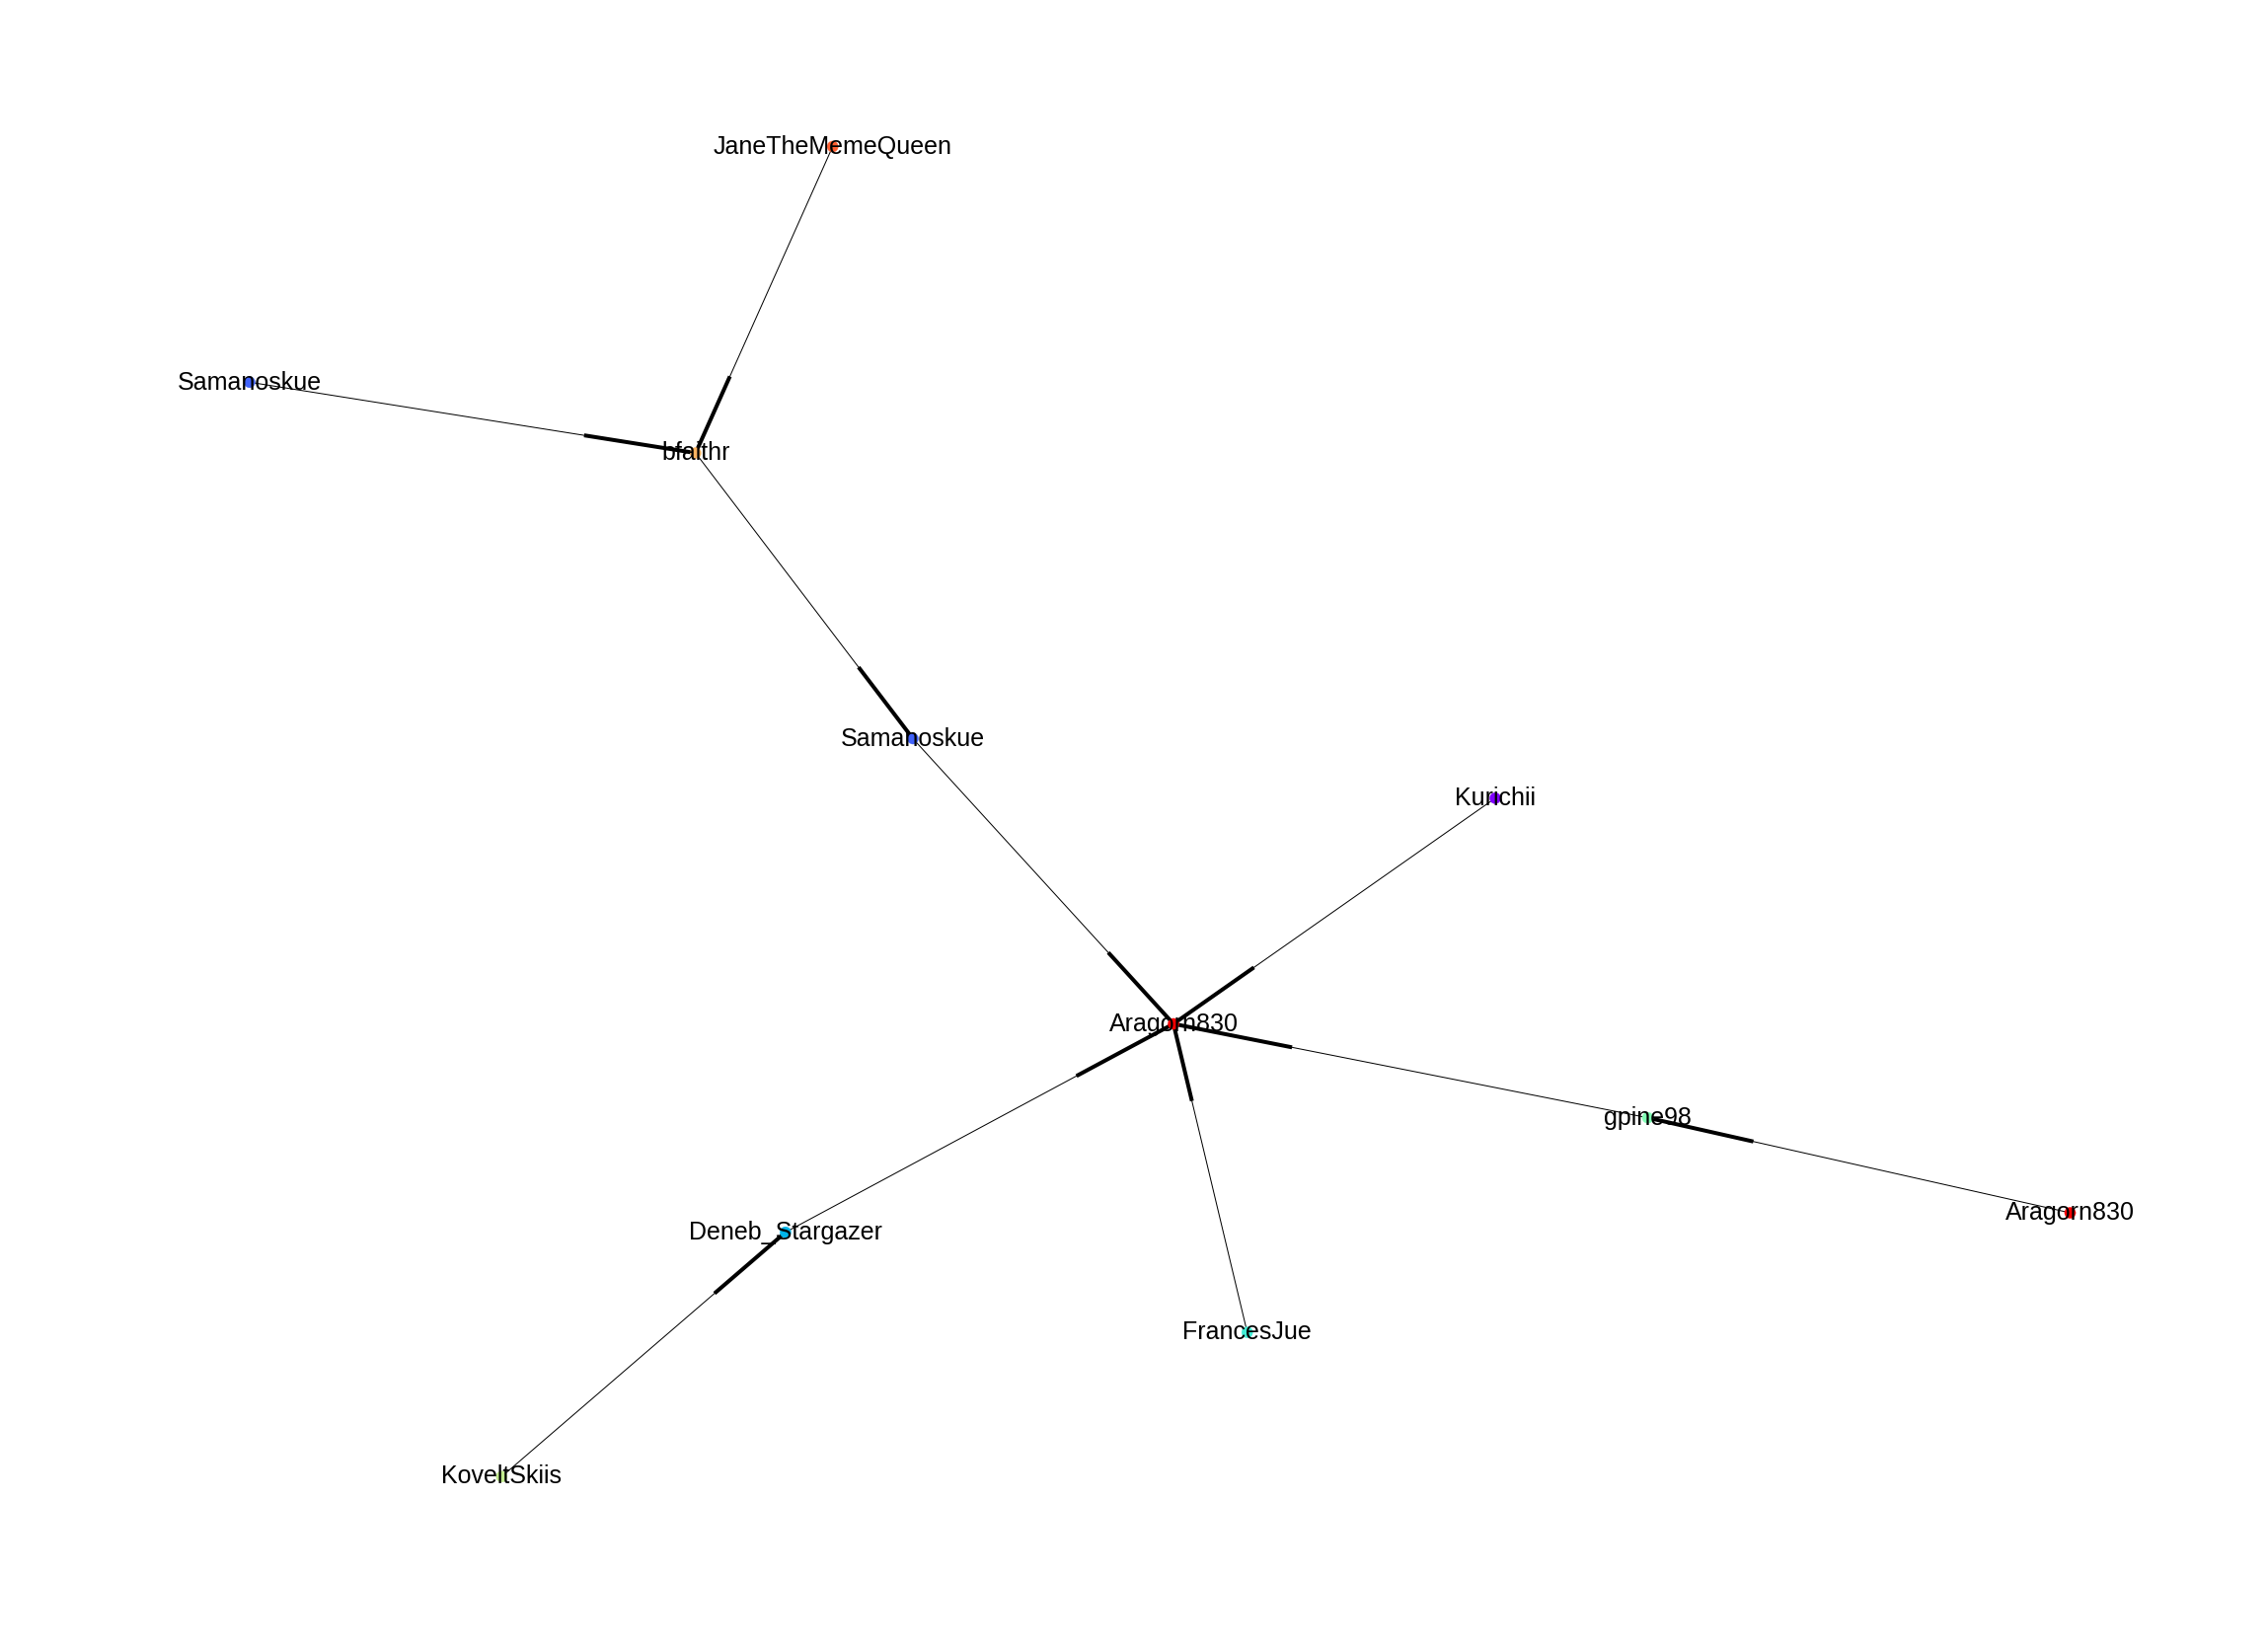

In [62]:
drawReplyGraph(ReplyGraphs_BL[BL_Graphs.keys()[1]])

In [68]:
# drawReplyGraph(ReplyGraphs_BL[BL_Graphs.keys()[1]])

In [26]:
print BL_Graphs[BL_Graphs.keys()[10]].edges(data=True)
print "---------------------------------------------"
print SW_Graphs[SW_Graphs.keys()[10]].edges(data=True)

[(u'CaptainStars-LIME', u'Xmaspast', {'weight': 0.1111111111111111}), (u'Xmaspast', u'Jay-97', {'weight': 0.2}), (u'BenderDeLorean', u'Jay-97', {'weight': 0.125}), (u'dankassmememachine', u'lucasl664', {'weight': 0.0}), (u'lucasl664', u'Jay-97', {'weight': 0.075})]
---------------------------------------------
[(u'Mandrake420', u'readytogoTA', {'weight': 0.2}), (u'trifthen', u'readytogoTA', {'weight': 0.2962962962962963}), (u'Psy-Kosh', u'readytogoTA', {'weight': 0.1111111111111111}), (u'readytogoTA', u'taicapzen', {'weight': 0.075}), (u'readytogoTA', u'southernbrew08', {'weight': 0.26666666666666666}), (u'reveurenchante', u'readytogoTA', {'weight': 0.2}), (u'southernbrew08', u'readytogoTA', {'weight': 0.20833333333333331}), (u'taicapzen', u'readytogoTA', {'weight': 0.225})]


In [29]:
[k[2]['weight'] for k in  BL_Graphs[BL_Graphs.keys()[1]].edges(data=True)]

[0.05,
 0.275,
 0.21428571428571427,
 0.025,
 0.075,
 0.05,
 0.0,
 0.35714285714285715,
 0.1111111111111111,
 0.0]

In [40]:
def getEdgeMetrics(graphs):
    EdgeWeight = []
    aggregateEdgeWeights = []
    varianceEdgeWeights = []
    for k in graphs:
        weights = [k[2]['weight'] for k in  graphs[k].edges(data=True)] 
        aggregateEdgeWeights+=weights
        meanWeight= np.median(weights)
        varWeight = np.var(weights)
        if np.isnan(meanWeight):
            print "Found Nan centrality"
            continue
        else:
            EdgeWeight.append(meanWeight)
        
        if np.isnan(varWeight):
            print "Found Nan Clustering"
            continue
        else:
            varianceEdgeWeights.append(varWeight)
        
    return EdgeWeight , varianceEdgeWeights 
    

In [41]:
SW_edgeWeights , SW_edgeVars = getEdgeMetrics(SW_Graphs)

Found Nan centrality
Found Nan centrality
Found Nan centrality


In [42]:
BL_edgeWeights , BL_edgeVars = getEdgeMetrics(BL_Graphs)

Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan centrality
Found Nan cen

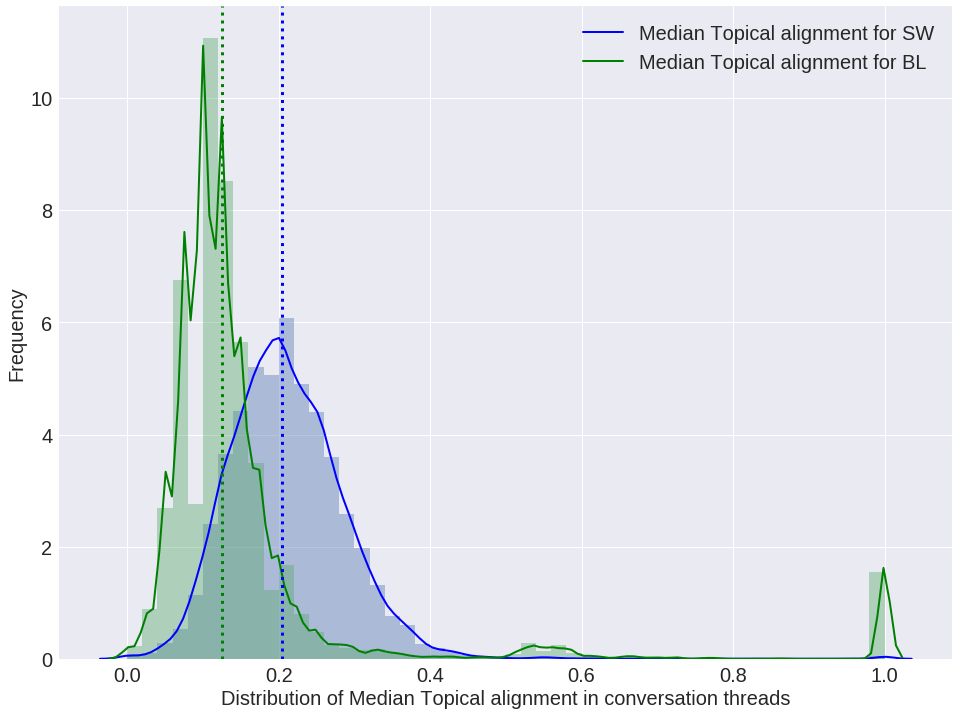

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
sns.set(font_scale=2) 
sns.distplot(SW_edgeWeights,kde_kws={"color": "b", "lw": 2, "label": "Median Topical alignment for SW"})
sns.distplot(BL_edgeWeights,kde_kws={"color": "g", "lw": 2, "label": "Median Topical alignment for BL"})
ax.axvline(x=np.median(SW_edgeWeights), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.median(BL_edgeWeights), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.xlabel("Distribution of Median Topical alignment in conversation threads" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

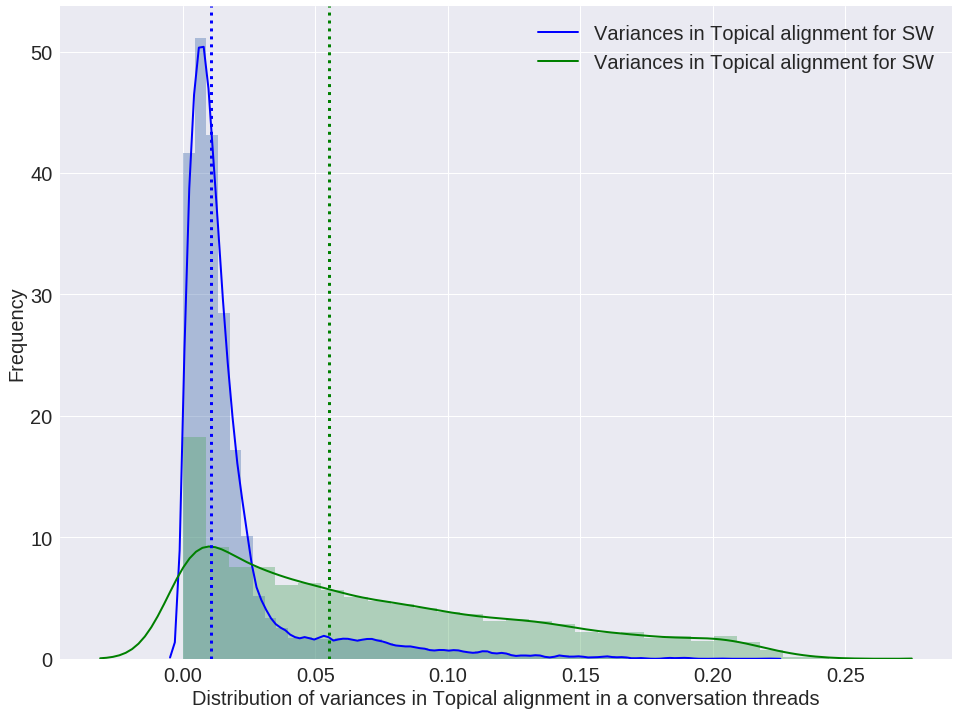

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
sns.set(font_scale=2) 
sns.distplot(SW_edgeVars,kde_kws={"color": "b", "lw": 2, "label": "Variances in Topical alignment for SW"})
sns.distplot(BL_edgeVars,kde_kws={"color": "g", "lw": 2, "label": "Variances in Topical alignment for SW"})
ax.axvline(x=np.median(SW_edgeVars), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.median(BL_edgeVars), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.xlabel("Distribution of variances in Topical alignment in a conversation threads" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

In [138]:
ReplyGraphs_SW[ReplyGraphs_SW.keys()[101]].nodes(data=True)

[(u't1_c6xmw8s',
  {'affects': 3,
   'author': u'bluegerm',
   'depth': 1,
   'downs': 0,
   'text': 'why do you want to run away, are you having problems with your family?',
   'time': 1352263881.0,
   'ups': 2}),
 (u't1_c6xqd6v',
  {'affects': 3,
   'author': u'bluegerm',
   'depth': 3,
   'downs': 0,
   'text': "It sounds like you want to escape because you think it's an easy way out of your problems.  It isn't an easy way out, it's just a fantasy.  While you continue the fantasy you'll continue to avoid dealing with the problems with your life and let them build.  One day they may become big enough to make you feel you have no choice.  The real way out is to start facing your problems one by one and begin dealing with them, finding solutions.  You can do it.  You'll grow and change.  Accept the challenge of life and you'll begin to enjoy it.",
   'time': 1352286834.0,
   'ups': 1}),
 (u't1_c6xkqq2',
  {'affects': 3,
   'author': u'Kolkhoz',
   'depth': -1,
   'downs': 0,
   'text':

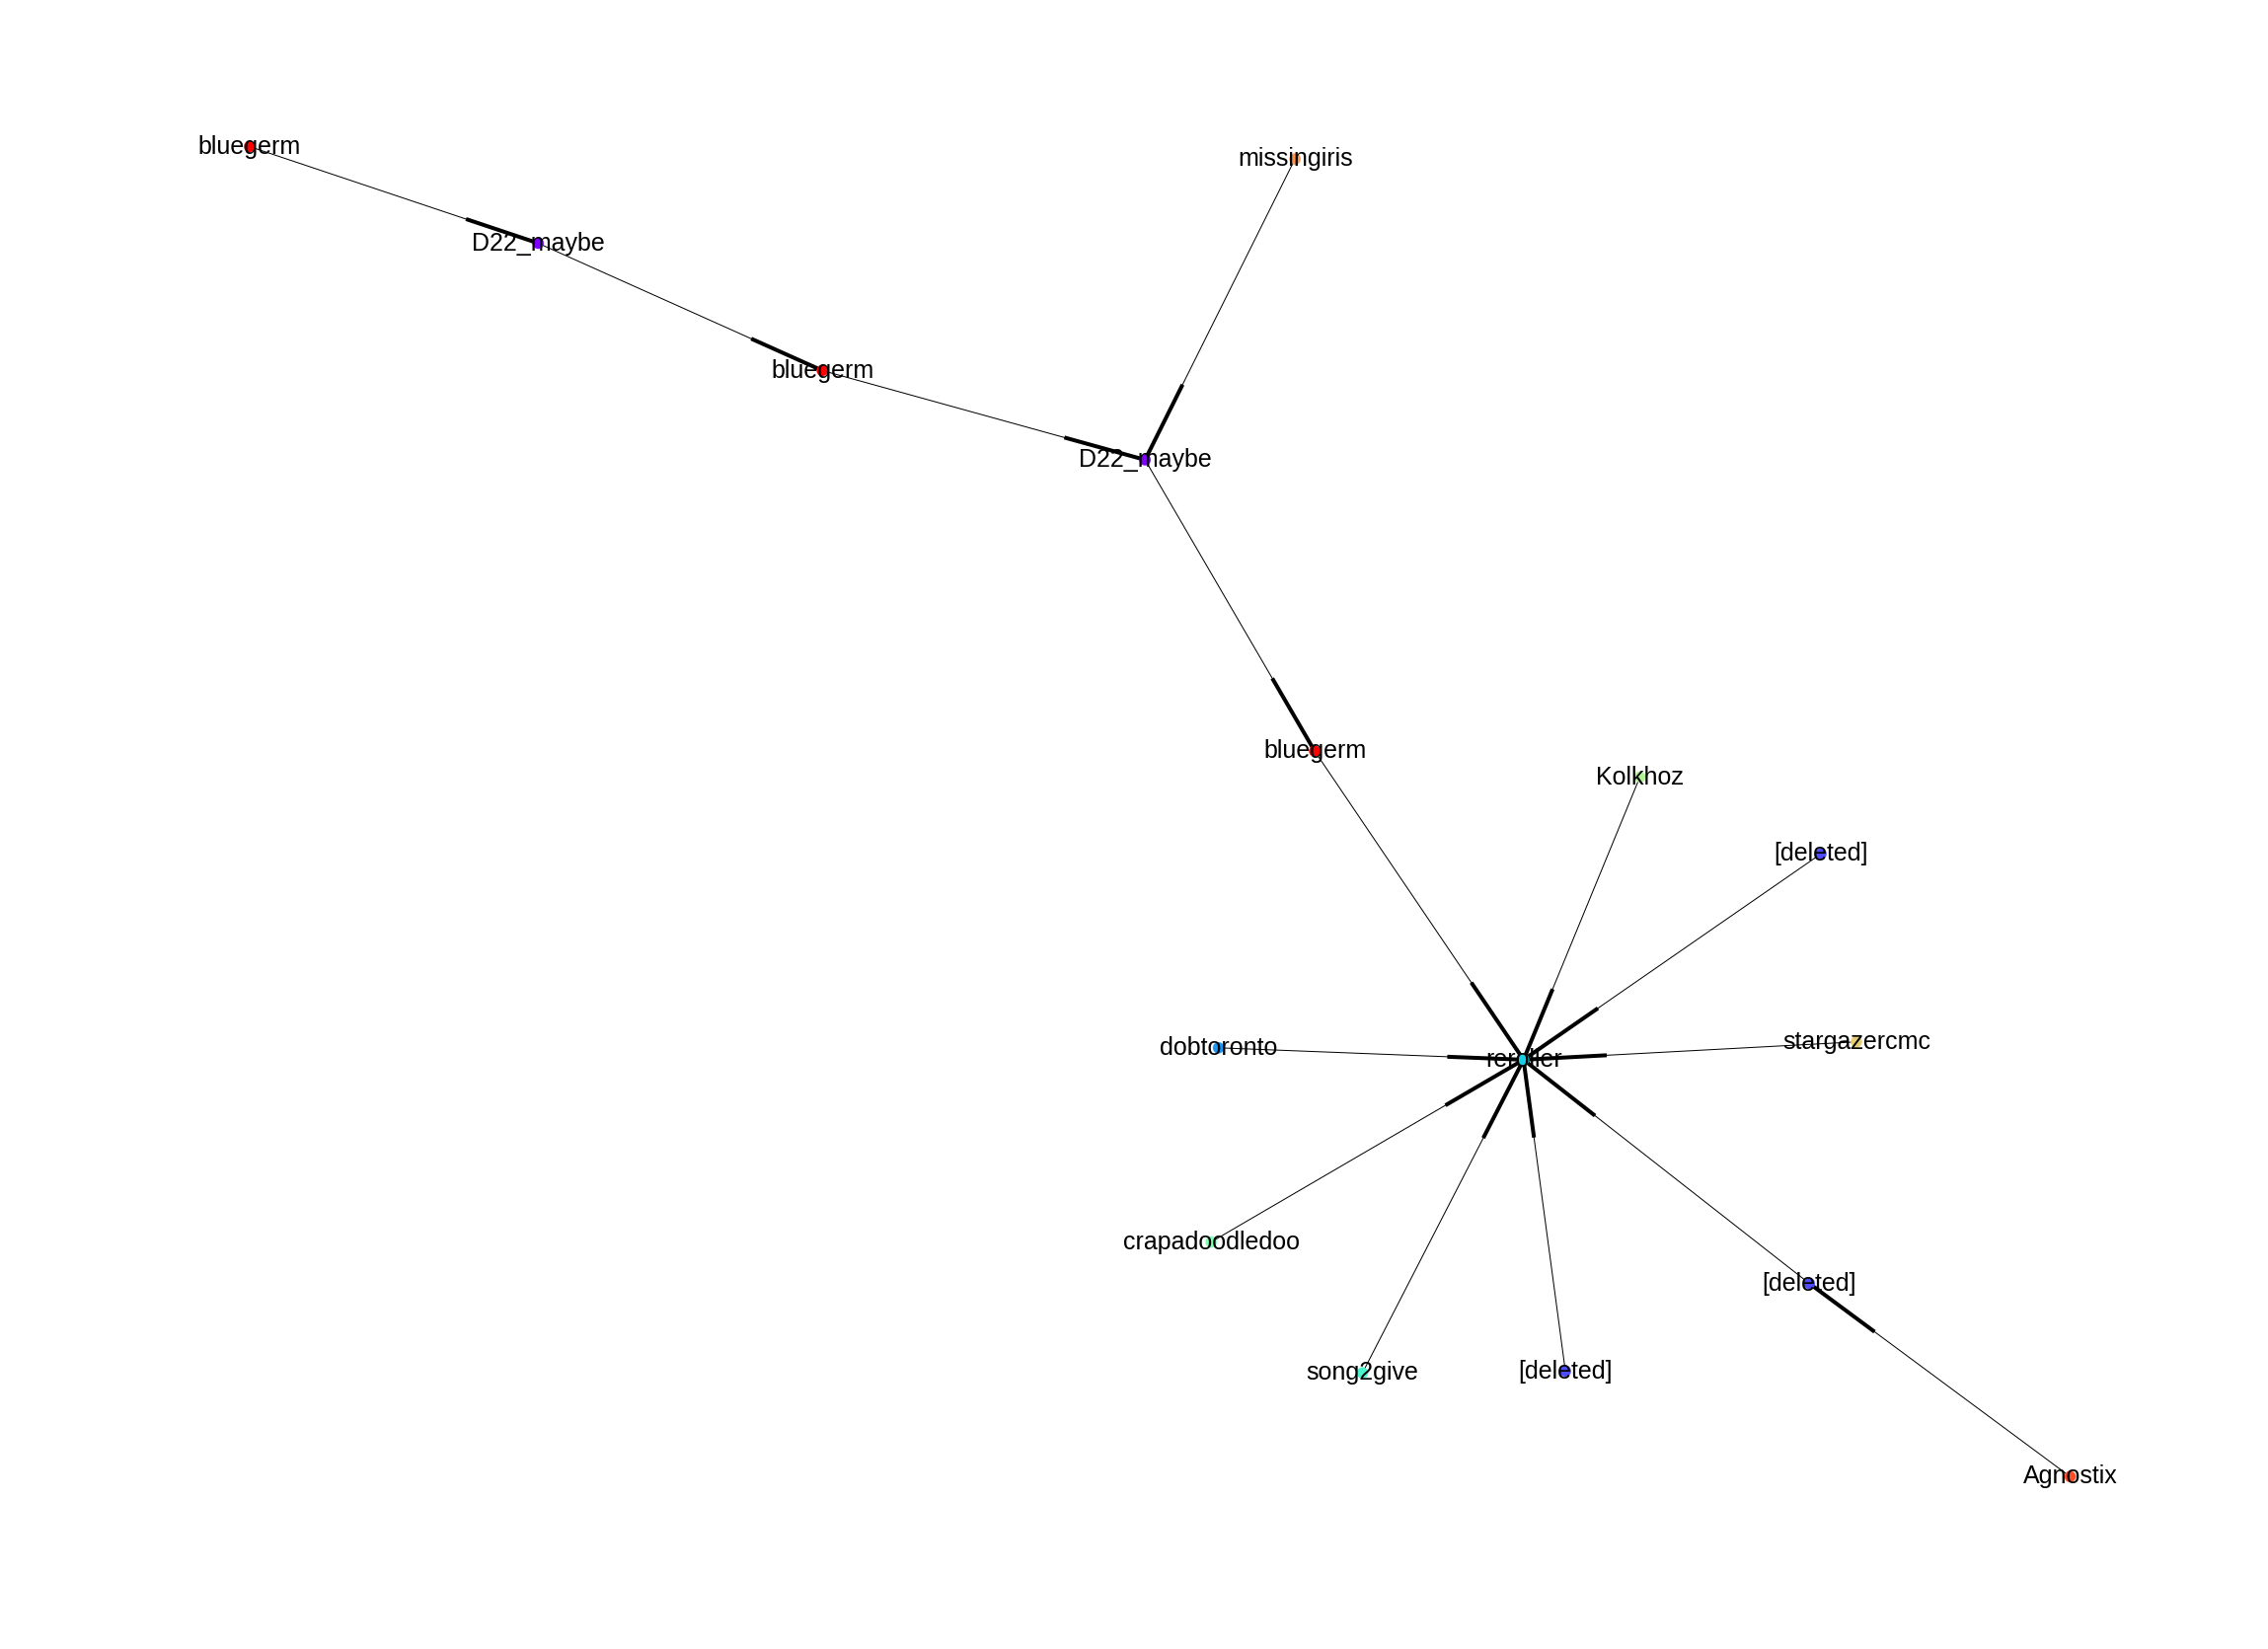

In [139]:
drawReplyGraph(ReplyGraphs_SW[ReplyGraphs_SW.keys()[101]])

In [136]:
class Tree:
    nxGraph = None
    path = []
    nodes = {}
    visited = []
    def __init__(self,G):
        self.nxGraph = G
        nodes = G.nodes(data=True)
        for n in nodes:
            self.nodes[n[0]] = n[1]
        
    def parseTree(self,node):
        if node != None:
            print self.nodes[node]
            self.visited.append(node)
            inEdges = self.nxGraph.in_edges(node , data=True)
            for k in inEdges:
                if k not in self.visited:
                    print k
                    self.parseTree(k[0])        
    
    def printPath(self):
        print self.path
    

def findLongChains(replyGraphs):
    chains = {}
    for k in replyGraphs:
        print "helllo"
        
        

In [137]:
parseOb = Tree(ReplyGraphs_SW[ReplyGraphs_SW.keys()[100]])
parseOb.parseTree('t1_c1gpf9m' )

{'author': u'PrincessofCats', 'affects': 3, 'downs': 0, 'depth': -1, 'text': "A lot of this stuff is way, way over my head, but social anxiety is something that I'm intimately familiar with.  I was ruthlessly bullied (and more) when I was 12, also, and like you, it screwed me up pretty bad.  I was lucky in that I have an upbringing where a certain amount of social grace was expected of me, so I'm pretty good at faking it when I'm uncomfortable, but dealing with people does take a toll on me.Like you said, there's no magic pill.  The way to learn to cope with your social anxiety is to push yourself just a hair past your comfort zone as often as possible.    Maybe you could start by finding a coffee shop with internet access and browsing Reddit there instead of at home.   :)   I know it sounds stupid, but if you spent time getting used to all of the sounds of people surrounding you and doing stuff and talking, the movement out of the corner of your eye, etc, that's a step in the right di

In [120]:
parseOb.printPath()

[]
